<H1>Environmental Monitoring with air quality prediction</H1>

<P>Air pollution affects humans and the ecosystem alike. Poor air quality leads to respiratory disease, while contributing to climate change which is a worldwide problem <br>
This machine learning project aims to serve as a decision support system - to assist in making informed choices
</P>

In [26]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error

<p>Remarks:
1. All Pollutant unit in μg/m3 except CO which is in 10μg/m3<br>
2. N.A. = data not available<br>
3. CO = Carbon Monoxide<br>
4. FSP = Fine Suspended Particulates<br>
5. NO2 = Nitrogen Dioxide<br>
6. NOX = Nitrogen Oxides<br>
7. O3 = Ozone<br>
8. RSP = Respirable Suspended Particulates<br>
9. SO2 = Sulphur Dioxide<br>
</p>xide
</p>

In [51]:
file_path_1 = "air_hourly_1.csv"
file_path_2 = "air_hourly_2.csv"
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)
df_air = df1.merge(df1, on=['DATE', 'STATION', 'SO2', 'NOX', 'NO2', 'CO', 'RSP', 'O3', 'FSP'])

print(df_air.head())
df_air['STATION'].unique()

        DATE  HOUR_x       STATION   SO2  NOX  NO2   CO RSP O3 FSP  HOUR_y
0  1/12/2013       1  CAUSEWAY BAY  N.A.  540  198  100  72  5  48       1
1  1/12/2013       2  CAUSEWAY BAY    12  334  128  131  62  5  41       2
2  1/12/2013       3  CAUSEWAY BAY    11  390  128  127  56  5  38       3
3  1/12/2013       4  CAUSEWAY BAY    10  237  109   99  53  8  36       4
4  1/12/2013       5  CAUSEWAY BAY    10  292  120  107  51  8  34       5


array(['CAUSEWAY BAY', 'CENTRAL', 'CENTRAL/WESTERN', 'EASTERN',
       'KWAI CHUNG', 'KWUN TONG', 'MONG KOK', 'SHAM SHUI PO', 'SHATIN',
       'TUNG CHUNG', 'TAP MUN', 'TUEN MUN', 'TAI PO', 'TSUEN WAN',
       'YUEN LONG'], dtype=object)

In [48]:
greenhouse_gas_file_path = "greenhouse_gas_emissions_and_carbon_intensity.json"
df_ghg = pd.read_json(greenhouse_gas_file_path)
print(df_ghg.head())

# Total_GHG_emissions	(kilotonnes CO2-e)	 Unit: kilotonnes CO2-e


   Report_Year  Total_GHG_emissions  Per_captia_emissions  Carbon_Intensity
0         1990                35700                  6.27             0.034
1         1991                39200                  6.82             0.035
2         1992                43500                  7.50             0.037
3         1993                43800                  7.42             0.035
4         1994                36400                  6.03             0.027


In [54]:
#reading df for air quality
folder_path = "./air_quality_index"
dfs = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Ensure only CSV files are considered
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file into a DataFrame, skipping the first 5 rows
        df = pd.read_csv(file_path, skiprows=6)
        dfs.append(df)
df_air_index = pd.concat(dfs, ignore_index = True)
print(df_air_index.describe())

              Date  Hour Central/Western Eastern Kwun Tong Sham Shui Po  \
count          364  9100            9096    9096      9096         9095   
unique         304    25              25      22        24           23   
top     2019-09-30    01               3       3         3            3   
freq             2   364            2468    2891      3018         2777   

       Kwai Chung Tsuen Wan Yuen Long Tuen Mun Tung Chung Tai Po Sha Tin  \
count        9087      9083      9077     9092       9078   9062    9082   
unique         24        23        22       28         18     24      19   
top             3         3         3        3          2      3       3   
freq         2602      2549      2855     2984       2805   2737    2457   

       Tap Mun Causeway Bay Central Mong Kok Tseung Kwan O  
count     9068         9090    9092     9091          6023  
unique      21           20      25       26            17  
top          2            4       3        3             3  

In [78]:
x = df_air.loc[df_air['STATION'] == 'CENTRAL', 'SO2']
y = df_air_index['Central']
print(x.shape)
print(y.shape)

(18320,)
(9100,)


ValueError: x and y must have same first dimension, but have shapes (18320,) and (9100,)

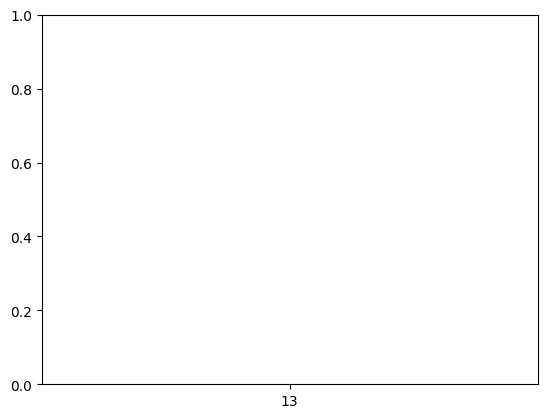

In [76]:
#plotting graphs between air quality index and differenc compositions of air
x = df_air.loc[df_air['STATION'] == 'CENTRAL', 'SO2']
y = df_air_index['Central']
plt.plot(x, y, '.')
plt.xlabel("air composition")
plt.ylabel("air index")
plt.show()